## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練

Ans: 最後一個Epoch 得到 15s 308us/step - loss: 0.0607 - acc: 0.9812 - val_loss: 4.5329 - val_acc: 0.51675
有overfit 的情況發生


2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
Ans: 
MLP改為七層 [512,512,512,256, 256, 128,128]
最後一個Epoch 得到 20s 392us/step - loss: 0.0585 - acc: 0.9832 - val_loss: 3.5012 - val_acc: 0.5392
仍然有overfit的情況發生, 不過validate set的 loss及acc有比較好一些
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [104]:
## 
"""
Your code here (optional)
確認硬體資源
"""
"!nvidia-smi"

'!nvidia-smi'

In [105]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [106]:
train, test = keras.datasets.cifar10.load_data()

In [107]:
## 資料前處理
import numpy as np
def preproc_x(x, flatten=True):
 
    #print("type",type(x[0][0][0][0]))    

    x = np.float_(x)  #一定要一次轉換整個array為float, 不能放在下面的迴圈每個sample分段轉 會有問題(無法轉換成功)
    #print("type0",type(x[0][0][0][0]))
    for index in range(len(x)):
        value_max = float(x[index].max())
        value_mix = float(x[index].min())
        #float_x = np.float_(x[index]) #在這裡轉換後,即使填回去x[index]也會又轉回uint8
        x[index] = ((x[index] -value_mix)/(value_max-value_mix) -0.5)*2
        
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [108]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [109]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512,512,512,256, 256, 128,128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        print("i=",i);
        print("n_units=",n_units);
        if i == 0:            
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

i= 0
n_units= 512
i= 1
n_units= 512
i= 2
n_units= 512
i= 3
n_units= 256
i= 4
n_units= 256
i= 5
n_units= 128
i= 6
n_units= 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               65792     
________________

In [110]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [111]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [112]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 414us/step - loss: 1.6883 - acc: 0.3981 - val_loss: 1.5366 - val_acc: 0.4518
Epoch 2/100
50000/50000 [==============================] - 21s 420us/step - loss: 1.4545 - acc: 0.4856 - val_loss: 1.4342 - val_acc: 0.4889
Epoch 3/100
50000/50000 [==============================] - 19s 386us/step - loss: 1.3290 - acc: 0.5304 - val_loss: 1.3767 - val_acc: 0.5159
Epoch 4/100
50000/50000 [==============================] - 19s 382us/step - loss: 1.2384 - acc: 0.5630 - val_loss: 1.3542 - val_acc: 0.5281
Epoch 5/100
50000/50000 [==============================] - 21s 420us/step - loss: 1.1340 - acc: 0.5988 - val_loss: 1.3752 - val_acc: 0.5263
Epoch 6/100
50000/50000 [==============================] - 19s 378us/step - loss: 1.0491 - acc: 0.6291 - val_loss: 1.3776 - val_acc: 0.5307
Epoch 7/100
50000/50000 [==============================] - 20s 399us/step - loss: 0.9586 - acc: 0.6595 - val_l

50000/50000 [==============================] - 21s 427us/step - loss: 0.0688 - acc: 0.9776 - val_loss: 3.2179 - val_acc: 0.5321: 6s - loss: 0.0629 - acc: 0.979 - ETA: 6s - loss: 0.0630 - acc - ETA: 5s - loss: 0.0638 - acc: 0.97 - ETA: 5s - loss: 0.0638 - acc - ETA: 4s - loss: 0.0646 - acc: 0.9 - ETA: 0s - loss: 0.0688 - acc: 0.9
Epoch 48/100
50000/50000 [==============================] - 19s 378us/step - loss: 0.0844 - acc: 0.9722 - val_loss: 3.0526 - val_acc: 0.5368
Epoch 49/100
50000/50000 [==============================] - 19s 380us/step - loss: 0.0693 - acc: 0.9782 - val_loss: 3.2328 - val_acc: 0.5344
Epoch 50/100
50000/50000 [==============================] - 19s 383us/step - loss: 0.0714 - acc: 0.9766 - val_loss: 3.1850 - val_acc: 0.5333
Epoch 51/100
50000/50000 [==============================] - 21s 416us/step - loss: 0.0748 - acc: 0.9757 - val_loss: 3.1884 - val_acc: 0.5396
Epoch 52/100
50000/50000 [==============================] - 19s 380us/step - loss: 0.0747 - acc: 0.9757 -

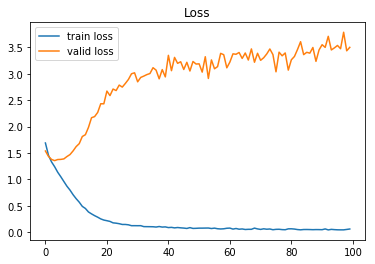

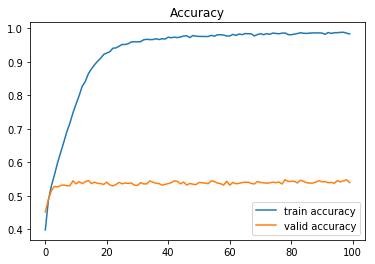

In [114]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()